In [0]:
import tensorflow as tf
tf.enable_eager_execution()
import matplotlib.pyplot as plt
import numpy as np
import random
from progressbar import progressbar
from keras.utils import to_categorical
import time

In [0]:
def build_fc_model():
  fc_model = tf.keras.Sequential([
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, input_shape=(784,),activation=tf.nn.relu),
      tf.keras.layers.Dense(10, input_shape=(128,),activation=tf.nn.softmax)
  ])
  return fc_model

In [0]:
def build_fc_tanh_model():
  fc_model = tf.keras.Sequential([
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, input_shape=(784,),activation=tf.nn.tanh),
      tf.keras.layers.Dense(10, input_shape=(128,),activation=tf.nn.softmax)
  ])
  return fc_model

In [0]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(24, kernel_size=(3, 3) , activation=tf.nn.relu, input_shape=(28, 28, 1) ),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
        tf.keras.layers.Conv2D(36, kernel_size=(3, 3) , activation=tf.nn.relu, input_shape=(13, 13, 24) ),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(748, input_shape=(900,),activation=tf.nn.relu),
        tf.keras.layers.Dense(128, input_shape=(784,),activation=tf.nn.relu),
        tf.keras.layers.Dense(10, input_shape=(128,),activation=tf.nn.softmax)
        
    ])
    return cnn_model

In [0]:
def build_cnn_tanh_model():
    cnn_model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(24, kernel_size=(3, 3) , activation=tf.nn.tanh, input_shape=(28, 28, 1) ),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
        tf.keras.layers.Conv2D(36, kernel_size=(3, 3) , activation=tf.nn.tanh, input_shape=(13, 13, 24) ),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(748, input_shape=(900,), activation=tf.nn.tanh),
        tf.keras.layers.Dense(128, input_shape=(784,), activation=tf.nn.tanh),
        tf.keras.layers.Dense(10, input_shape=(128,), activation=tf.nn.softmax)
        
    ])
    return cnn_model

11493376/11490434 [==============================] - 0s 0us/step


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


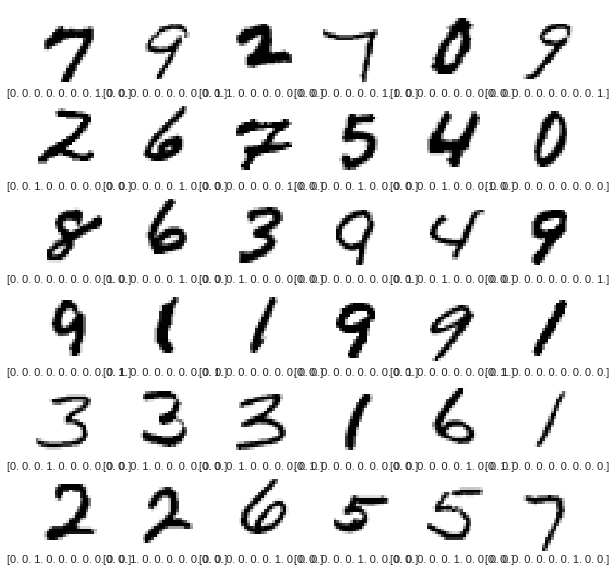

In [5]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = np.expand_dims(train_images, axis=-1)/255.
train_labels = np.int64(train_labels)
test_images = np.expand_dims(test_images, axis=-1)/255.
test_labels = np.int64(test_labels)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

Relu for FC Model
-----------------------

Applying Relu activation functions on FC model

optimizer is Adam with learning rate = 0.0009

In [34]:
model = build_fc_model()
BATCH_SIZE = 64
EPOCHS = 5
# TODO compile and fit the model with the appropriate parameters.
model.compile(optimizer= tf.keras.optimizers.Adam(lr=0.0009) , 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
time1 = time.time()
model.fit(x=train_images,y=train_labels, validation_split= 0.2, epochs=EPOCHS)
time2 = time.time()
print("Running Time: " + str((time2-time1)*1000.0) + " ms")
test_acc = model.evaluate(test_images, test_labels, batch_size=BATCH_SIZE)
#TODO: Use the evaluate method to test the model.


print('Test accuracy:', test_acc)


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 8s 170us/sample - loss: 0.2917 - acc: 0.9170 - val_loss: 0.1533 - val_acc: 0.9584
Epoch 2/5
48000/48000 [==============================] - 7s 145us/sample - loss: 0.1277 - acc: 0.9622 - val_loss: 0.1162 - val_acc: 0.9657
Epoch 3/5
48000/48000 [==============================] - 7s 148us/sample - loss: 0.0884 - acc: 0.9737 - val_loss: 0.1024 - val_acc: 0.9702
Epoch 4/5
48000/48000 [==============================] - 7s 142us/sample - loss: 0.0642 - acc: 0.9812 - val_loss: 0.0924 - val_acc: 0.9722
Epoch 5/5
48000/48000 [==============================] - 7s 148us/sample - loss: 0.0509 - acc: 0.9849 - val_loss: 0.0853 - val_acc: 0.9747
Running Time: 37400.82764625549 ms
10000/10000 [==============================] - 0s 26us/sample - loss: 0.0764 - acc: 0.9771
Test accuracy: [0.07638369548758492, 0.9771]


Using SGD with learning rate =0.05 accuracy is 96.51%
so Adam is better.

In [31]:
model = build_fc_model()
BATCH_SIZE = 64
EPOCHS = 5
# TODO compile and fit the model with the appropriate parameters.
model.compile(optimizer= tf.keras.optimizers.SGD(lr=0.05) , 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=train_images,y=train_labels, validation_split= 0.2, epochs=EPOCHS)

test_acc = model.evaluate(test_images, test_labels, batch_size=BATCH_SIZE)
#TODO: Use the evaluate method to test the model.


print('Test accuracy:', test_acc)


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 6s 126us/sample - loss: 0.3960 - acc: 0.8919 - val_loss: 0.2367 - val_acc: 0.9345
Epoch 2/5
48000/48000 [==============================] - 5s 106us/sample - loss: 0.2178 - acc: 0.9379 - val_loss: 0.1861 - val_acc: 0.9499
Epoch 3/5
48000/48000 [==============================] - 5s 109us/sample - loss: 0.1668 - acc: 0.9524 - val_loss: 0.1499 - val_acc: 0.9602
Epoch 4/5
48000/48000 [==============================] - 5s 108us/sample - loss: 0.1360 - acc: 0.9612 - val_loss: 0.1340 - val_acc: 0.9628
Epoch 5/5
10000/10000 [==============================] - 0s 25us/sample - loss: 0.1160 - acc: 0.9651
Test accuracy: [0.11601644149646163, 0.9651]


Tanh for FC Model
------------------------
Applying Tanh optimizer on FC model, we observe that Relu is better than Tanh in Accuracy

In [23]:
model_tanh = build_fc_tanh_model()
BATCH_SIZE = 64
EPOCHS = 5
# TODO compile and fit the model with the appropriate parameters.
model_tanh.compile(optimizer= tf.keras.optimizers.Adam(lr=0.0009) , 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model_tanh.fit(x=train_images,y=train_labels, validation_split= 0.2, epochs=EPOCHS)

test_acc = model_tanh.evaluate(test_images, test_labels, batch_size=BATCH_SIZE)
#TODO: Use the evaluate method to test the model.


print('Test accuracy:', test_acc)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 7s 141us/sample - loss: 0.3175 - acc: 0.9094 - val_loss: 0.1953 - val_acc: 0.9464
Epoch 2/5
48000/48000 [==============================] - 6s 128us/sample - loss: 0.1619 - acc: 0.9529 - val_loss: 0.1403 - val_acc: 0.9591
Epoch 3/5
48000/48000 [==============================] - 6s 128us/sample - loss: 0.1119 - acc: 0.9679 - val_loss: 0.1218 - val_acc: 0.9654
Epoch 4/5
48000/48000 [==============================] - 6s 129us/sample - loss: 0.0839 - acc: 0.9761 - val_loss: 0.1023 - val_acc: 0.9693
Epoch 5/5
10000/10000 [==============================] - 0s 25us/sample - loss: 0.0954 - acc: 0.9701
Test accuracy: [0.09544817203953862, 0.9701]


Relu for CNN Model
-----------------------

Applying Relu activation functions on CNN model

optimizer is Adam with learning rate = 0.0009


In [35]:
cnn_model = build_cnn_model()
print(cnn_model.summary())

#TODO: Compile and fit the CNN model.
cnn_model.compile(optimizer= tf.keras.optimizers.Adam(lr=0.0009) , 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
time1 = time.time()
cnn_model.fit(x=train_images,y=train_labels, validation_split= 0.2, epochs=EPOCHS)
time2 = time.time()
print("Running Time: " + str((time2-time1)*1000.0) + " ms")
test_acc = cnn_model.evaluate(test_images, test_labels, batch_size=BATCH_SIZE)
#TODO: Use the evaluate method to test the model.

print('Test accuracy:', test_acc)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 24)        240       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 24)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 36)        7812      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 36)          0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 900)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 748)               673948    
_________________________________________________________________
dense_57 (Dense)             (None, 128)               95872     
__________

Using SGD with learning rate =0.01 accuracy is 98.11%
so Adam is better.

In [29]:
cnn_model = build_cnn_model()
print(cnn_model.summary())

#TODO: Compile and fit the CNN model.
cnn_model.compile(optimizer= tf.keras.optimizers.SGD(lr=0.01) , 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
cnn_model.fit(x=train_images,y=train_labels, validation_split= 0.2, epochs=EPOCHS)

test_acc = cnn_model.evaluate(test_images, test_labels, batch_size=BATCH_SIZE)
#TODO: Use the evaluate method to test the model.

print('Test accuracy:', test_acc)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 24)        240       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 24)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 11, 11, 36)        7812      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 36)          0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 900)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 748)               673948    
_________________________________________________________________
dense_46 (Dense)             (None, 128)               95872     
__________

Prediction
----------------
Prediction of the first image of the test set is Correct applying CNN Model.

In [8]:
predictions = cnn_model.predict(test_images)

predictions[0]

#TODO: identify the digit with the highest confidence prediction for the first image in the test dataset
print(np.argmax(predictions[0])) 
print(np.argmax(test_labels[0]))
  

test_labels[0]

7
7


array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

Tanh for CNN Model
------------------------
Applying Tanh optimizer on CNN model, as we see Relu is better than tanh in accuracy on Test set

In [26]:
cnn_tanh_model = build_cnn_tanh_model()
print(cnn_tanh_model.summary())

#TODO: Compile and fit the CNN model.
cnn_tanh_model.compile(optimizer= tf.keras.optimizers.Adam(lr=0.0009) , 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
cnn_tanh_model.fit(x=train_images,y=train_labels, validation_split= 0.2, epochs=EPOCHS)

test_acc = cnn_tanh_model.evaluate(test_images, test_labels, batch_size=BATCH_SIZE)
#TODO: Use the evaluate method to test the model.

print('Test accuracy:', test_acc)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 24)        240       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 24)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 36)        7812      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 36)          0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 900)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 748)               673948    
_________________________________________________________________
dense_38 (Dense)             (None, 128)               95872     
__________

Comparison between FC vs. CNN :
---------------------------------------
- Accuracy of Test set using Relu (accuracy of CNN is better.) : 
  - FC : 97.71%
  - CNN: 99.13% 
 
- Time: CNN takes more time than FC.
- Accuracy of training set : 
  - FC: loss: 0.0517 - acc: 0.9848 - val_loss: 0.0890 - val_acc: 0.9732
  - CNN: loss: 0.0172 - acc: 0.9944 - val_loss: 0.0350 - val_acc: 0.9911